# 準備

## Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [2]:
import sys
sys.path.append('/content/drive/My Drive/DNN_code_colab_lesson_1_2')
sys.path.append('/content/drive/My Drive/DNN_code_colab_lesson_1_2/lesson_2')

# optimizer

## SGD

データ読み込み完了
Generation: 991. 正答率(トレーニング) = 0.13
                : 991. 正答率(テスト) = 0.1135
Generation: 992. 正答率(トレーニング) = 0.13
                : 992. 正答率(テスト) = 0.1135
Generation: 993. 正答率(トレーニング) = 0.13
                : 993. 正答率(テスト) = 0.1135
Generation: 994. 正答率(トレーニング) = 0.13
                : 994. 正答率(テスト) = 0.1135
Generation: 995. 正答率(トレーニング) = 0.13
                : 995. 正答率(テスト) = 0.1135
Generation: 996. 正答率(トレーニング) = 0.13
                : 996. 正答率(テスト) = 0.1135
Generation: 997. 正答率(トレーニング) = 0.13
                : 997. 正答率(テスト) = 0.1135
Generation: 998. 正答率(トレーニング) = 0.13
                : 998. 正答率(テスト) = 0.1135
Generation: 999. 正答率(トレーニング) = 0.13
                : 999. 正答率(テスト) = 0.1135
Generation: 1000. 正答率(トレーニング) = 0.08
                : 1000. 正答率(テスト) = 0.1135


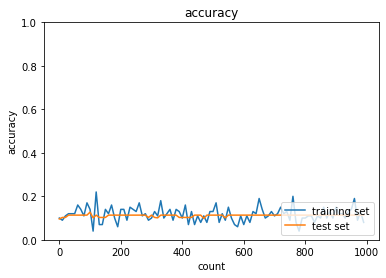

In [12]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet


# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================


network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
#learning_rate = 0.01
learning_rate = 0.05


train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
    
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
    if (i + 1) > 990:
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Momentum

データ読み込み完了
Generation: 901. 正答率(トレーニング) = 0.11
                : 901. 正答率(テスト) = 0.1135
Generation: 902. 正答率(トレーニング) = 0.11
                : 902. 正答率(テスト) = 0.1135
Generation: 903. 正答率(トレーニング) = 0.11
                : 903. 正答率(テスト) = 0.1135
Generation: 904. 正答率(トレーニング) = 0.11
                : 904. 正答率(テスト) = 0.1135
Generation: 905. 正答率(トレーニング) = 0.11
                : 905. 正答率(テスト) = 0.1135
Generation: 906. 正答率(トレーニング) = 0.11
                : 906. 正答率(テスト) = 0.1135
Generation: 907. 正答率(トレーニング) = 0.11
                : 907. 正答率(テスト) = 0.1135
Generation: 908. 正答率(トレーニング) = 0.11
                : 908. 正答率(テスト) = 0.1135
Generation: 909. 正答率(トレーニング) = 0.11
                : 909. 正答率(テスト) = 0.1135
Generation: 910. 正答率(トレーニング) = 0.11
                : 910. 正答率(テスト) = 0.1135
Generation: 911. 正答率(トレーニング) = 0.11
                : 911. 正答率(テスト) = 0.1135
Generation: 912. 正答率(トレーニング) = 0.11
                : 912. 正答率(テスト) = 0.1135
Generation: 913. 正答率(トレーニング) = 0.11
                : 913. 正答率(テスト

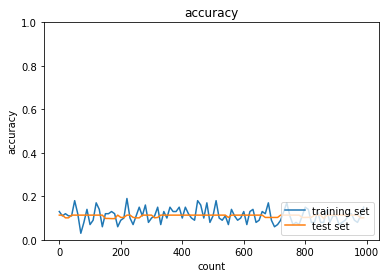

In [4]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

    if (i + 1) > 990:
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
    
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## MomentumをもとにAdaGradを作ってみよう
θ = 1e-4 とする

データ読み込み完了
Generation: 991. 正答率(トレーニング) = 0.96
                : 991. 正答率(テスト) = 0.9234
Generation: 992. 正答率(トレーニング) = 0.96
                : 992. 正答率(テスト) = 0.9234
Generation: 993. 正答率(トレーニング) = 0.96
                : 993. 正答率(テスト) = 0.9234
Generation: 994. 正答率(トレーニング) = 0.96
                : 994. 正答率(テスト) = 0.9234
Generation: 995. 正答率(トレーニング) = 0.96
                : 995. 正答率(テスト) = 0.9234
Generation: 996. 正答率(トレーニング) = 0.96
                : 996. 正答率(テスト) = 0.9234
Generation: 997. 正答率(トレーニング) = 0.96
                : 997. 正答率(テスト) = 0.9234
Generation: 998. 正答率(トレーニング) = 0.96
                : 998. 正答率(テスト) = 0.9234
Generation: 999. 正答率(トレーニング) = 0.96
                : 999. 正答率(テスト) = 0.9234
Generation: 1000. 正答率(トレーニング) = 0.97
                : 1000. 正答率(テスト) = 0.9223


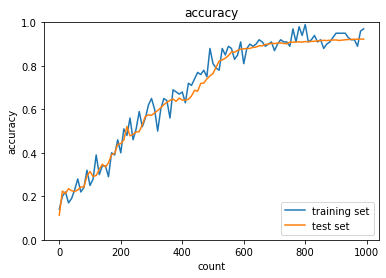

In [20]:
# AdaGradを作ってみよう
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
# iters_num = 500 # 処理を短縮

train_size = x_train.shape[0]
batch_size = 100
#learning_rate = 0.01
#learning_rate = 0.02
#learning_rate = 0.03
learning_rate = 0.04


# AdaGradでは不必要
# =============================

# momentum = 0.9 

# =============================

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
            
        # 変更しよう  
        # ===========================================
        #if i == 0:
        #    h[key] = np.zeros_like(network.params[key])        
        #h[key] = momentum * h[key] - learning_rate * grad[key]
        #network.params[key] += h[key]
        # ===========================================

        # revise AdaGrad
        if i == 0:
          h[key] = np.zeros_like(network.params[key]) 
        h[key] += grad[key] * grad[key]
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)


        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

    if (i + 1) > 990:
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## RSMprop

データ読み込み完了
Generation: 901. 正答率(トレーニング) = 0.98
                : 901. 正答率(テスト) = 0.9358
Generation: 902. 正答率(トレーニング) = 0.98
                : 902. 正答率(テスト) = 0.9358
Generation: 903. 正答率(トレーニング) = 0.98
                : 903. 正答率(テスト) = 0.9358
Generation: 904. 正答率(トレーニング) = 0.98
                : 904. 正答率(テスト) = 0.9358
Generation: 905. 正答率(トレーニング) = 0.98
                : 905. 正答率(テスト) = 0.9358
Generation: 906. 正答率(トレーニング) = 0.98
                : 906. 正答率(テスト) = 0.9358
Generation: 907. 正答率(トレーニング) = 0.98
                : 907. 正答率(テスト) = 0.9358
Generation: 908. 正答率(トレーニング) = 0.98
                : 908. 正答率(テスト) = 0.9358
Generation: 909. 正答率(トレーニング) = 0.98
                : 909. 正答率(テスト) = 0.9358
Generation: 910. 正答率(トレーニング) = 0.98
                : 910. 正答率(テスト) = 0.9292
Generation: 911. 正答率(トレーニング) = 0.98
                : 911. 正答率(テスト) = 0.9292
Generation: 912. 正答率(トレーニング) = 0.98
                : 912. 正答率(テスト) = 0.9292
Generation: 913. 正答率(トレーニング) = 0.98
                : 913. 正答率(テスト

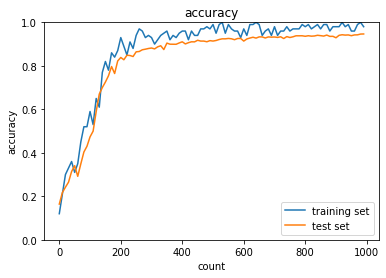

In [6]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
decay_rate = 0.99

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
    if (i + 1) > 990:
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Adam

データ読み込み完了
Generation: 930. 正答率(トレーニング) = 0.99
                : 930. 正答率(テスト) = 0.9518
Generation: 931. 正答率(トレーニング) = 0.99
                : 931. 正答率(テスト) = 0.9518
Generation: 932. 正答率(トレーニング) = 0.99
                : 932. 正答率(テスト) = 0.9518
Generation: 933. 正答率(トレーニング) = 0.99
                : 933. 正答率(テスト) = 0.9518
Generation: 934. 正答率(トレーニング) = 0.99
                : 934. 正答率(テスト) = 0.9518
Generation: 935. 正答率(トレーニング) = 0.99
                : 935. 正答率(テスト) = 0.9518
Generation: 936. 正答率(トレーニング) = 0.99
                : 936. 正答率(テスト) = 0.9518
Generation: 937. 正答率(トレーニング) = 0.99
                : 937. 正答率(テスト) = 0.9518
Generation: 938. 正答率(トレーニング) = 0.99
                : 938. 正答率(テスト) = 0.9518
Generation: 939. 正答率(トレーニング) = 0.99
                : 939. 正答率(テスト) = 0.9518
Generation: 940. 正答率(トレーニング) = 0.98
                : 940. 正答率(テスト) = 0.9492
Generation: 941. 正答率(トレーニング) = 0.98
                : 941. 正答率(テスト) = 0.9492
Generation: 942. 正答率(トレーニング) = 0.98
                : 942. 正答率(テスト

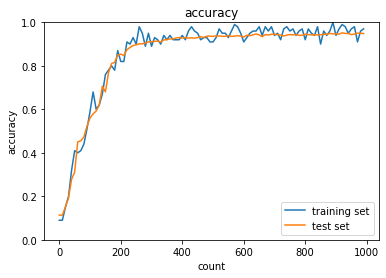

In [7]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
    if (i + 1) > 990:
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] 学習率を変えてみよう

## [try] 活性化関数と重みの初期化方法を変えてみよう
初期状態ではsigmoid - gauss<br>
activationはReLU、weight_init_stdは別の数値や'Xavier'・'He'に変更可能

## [try] バッチ正規化をしてみよう
use_batchnormをTrueにしよう

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------